# 07_1_LEARN-DataAnalysisML

<a target="_blank" href="https://colab.research.google.com/github/hiyama341/ConStrain/blob/main/colab_notebooks/07_1_LEARN_DataAnalysis.ipynb">
  <img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/>
</a>

In [1]:
import pandas as pd
import matplotlib as plt
import seaborn as sns
import matplotlib.pyplot as plt


In [2]:
# cloning the data repo
!git clone https://github.com/hiyama341/ConStrain_on_google_colab.git

fatal: destination path 'ConStrain_on_google_colab' already exists and is not an empty directory.


## 1. Setting up the AutoML library

In [3]:
%%capture 
!pip install h2o

In [4]:
import h2o
from h2o.automl import H2OAutoML

In [5]:
# If this doesnt work - install java. 
# Start the H2O cluster (locally)
h2o.init(ip="localhost", port=54323)

Checking whether there is an H2O instance running at http://localhost:54323 ..... not found.
Attempting to start a local H2O server...
  Java Version: java version "1.8.0_351"; Java(TM) SE Runtime Environment (build 1.8.0_351-b10); Java HotSpot(TM) 64-Bit Server VM (build 25.351-b10, mixed mode)
  Starting server from /Users/lucaslevassor/opt/anaconda3/envs/constrain/lib/python3.8/site-packages/h2o/backend/bin/h2o.jar
  Ice root: /var/folders/2f/lw3sfzbs7l7f_q1knzbtbwrr0000gp/T/tmp2egz_cwb
  JVM stdout: /var/folders/2f/lw3sfzbs7l7f_q1knzbtbwrr0000gp/T/tmp2egz_cwb/h2o_lucaslevassor_started_from_python.out
  JVM stderr: /var/folders/2f/lw3sfzbs7l7f_q1knzbtbwrr0000gp/T/tmp2egz_cwb/h2o_lucaslevassor_started_from_python.err
  Server is running at http://127.0.0.1:54323
Connecting to H2O server at http://127.0.0.1:54323 ... successful.


H2O_cluster_uptime:,09 secs
H2O_cluster_timezone:,Europe/Copenhagen
H2O_data_parsing_timezone:,UTC
H2O_cluster_version:,3.36.1.3
H2O_cluster_version_age:,4 months and 15 days !!!
H2O_cluster_name:,H2O_from_python_lucaslevassor_yihmqy
H2O_cluster_total_nodes:,1
H2O_cluster_free_memory:,3.541 Gb
H2O_cluster_total_cores:,8
H2O_cluster_allowed_cores:,8
H2O_cluster_status:,"locked, healthy"


### 1.1 Import out dataframe to h20 object

Train a model based on the target and the df

In [6]:
# Run ML with new input 
new_input_for_ml = pd.read_csv('ConStrain_on_google_colab/Data/AutoML/input_for_ml_1st_iteration_all_analytics.csv')
new_input_for_ml

,Unnamed: 0,Line_name,0,1,2,3,norm_strict_x,norm_strict_y,norm_strict_mean
0,0,yp49_A01,1,2,5,1,0.972701,1.796170,1.384435
1,1,yp49_C01,1,2,5,9,0.536658,0.738584,0.637621
2,2,yp49_D01,2,4,7,3,0.175896,0.109680,0.142788
3,3,yp49_E01,2,1,5,7,0.345201,0.228028,0.286614
4,4,yp49_F01,3,3,6,1,26.416324,23.762944,25.089634
...,...,...,...,...,...,...,...,...,...
164,164,yp51_C12,8,3,7,2,0.000000,0.089923,0.044961
165,165,yp51_D12,8,2,7,6,0.614962,1.264863,0.939912
166,166,yp51_E12,8,1,6,10,0.466688,2.068186,1.267437
167,167,yp50_F05,6,1,8,2,15.155009,12.813656,13.984332


In [7]:
new_input_for_ml['default_rank'] = new_input_for_ml['norm_strict_mean'].rank()
new_input_for_ml['max_rank'] = new_input_for_ml['norm_strict_mean'].rank(method='max')
new_input_for_ml['NA_bottom'] = new_input_for_ml['norm_strict_mean'].rank(na_option='bottom')
new_input_for_ml['pct_rank'] = new_input_for_ml['norm_strict_mean'].rank(pct=True)
new_input_for_ml = new_input_for_ml.sort_values(by= 'max_rank', ascending = False)

In [8]:
new_input_for_ml.head(50)

,Unnamed: 0,Line_name,0,1,2,3,norm_strict_x,norm_strict_y,norm_strict_mean,default_rank,max_rank,NA_bottom,pct_rank
75,75,yp50_D03,5,2,6,3,277.307816,124.097492,200.702654,169.0,169.0,169.0,1.000000
21,21,yp49_F04,3,2,6,2,138.940568,173.866982,156.403775,168.0,168.0,168.0,0.994083
77,77,yp50_G03,6,2,6,5,176.917201,94.730182,135.823691,167.0,167.0,167.0,0.988166
99,99,yp50_D07,5,2,5,5,140.230004,113.536081,126.883042,166.0,166.0,166.0,0.982249
27,27,yp49_F05,3,2,6,2,82.644068,164.975807,123.809937,165.0,165.0,165.0,0.976331
113,113,yp50_F10,6,2,5,4,113.702822,125.421804,119.562313,164.0,164.0,164.0,0.970414
88,88,yp50_E05,5,1,6,8,163.352037,74.173452,118.762744,163.0,163.0,163.0,0.964497
108,108,yp50_A09,4,2,6,3,152.013305,51.850298,101.931802,162.0,162.0,162.0,0.958580
87,87,yp50_D05,5,2,8,4,93.912536,70.543277,82.227906,161.0,161.0,161.0,0.952663
106,106,yp50_E08,5,1,5,9,81.980435,76.855892,79.418163,160.0,160.0,160.0,0.946746


In [9]:
# Choosing which coloums to train on 
new_input_for_ml = new_input_for_ml[['Line_name','0','1','2','3','norm_strict_mean']]
new_input_for_ml.columns = ['Line_name','0','1','2','3','Amt_norm']

In [10]:
df_test = h2o.H2OFrame(pd.concat([new_input_for_ml], axis='columns'))
df_test.describe()

Parse progress: |████████████████████████████████████████████████████████████████| (done) 100%
Rows:169
Cols:6




,Line_name,0,1,2,3,Amt_norm
type,string,int,int,int,int,real
mins,NaN,1.0,1.0,5.0,1.0,0.0
mean,NaN,4.562130177514795,2.674556213017752,6.562130177514795,5.313609467455622,14.10479163958606
maxs,NaN,8.0,4.0,8.0,10.0,200.70265418398645
sigma,NaN,2.246157609510621,1.1575337897875206,1.1639363454615017,2.8203962679881105,32.764977700359026
zeros,0,0,0,0,0,18
missing,0,0,0,0,0,0
0,yp50_D03,5.0,2.0,6.0,3.0,200.70265418398645
1,yp49_F04,3.0,2.0,6.0,2.0,156.40377474102974
2,yp50_G03,6.0,2.0,6.0,5.0,135.82369135381245


In [11]:
# Since the data is categorical we need to make it from numerical to categorical 

df_test['0']= df_test['0'].asfactor()
df_test['1']= df_test['1'].asfactor()
df_test['2'] = df_test['2'].asfactor()
df_test['3'] = df_test['3'].asfactor()


In [12]:
df_test.describe()

Rows:169
Cols:6




,Line_name,0,1,2,3,Amt_norm
type,string,enum,enum,enum,enum,real
mins,NaN,,,,,0.0
mean,NaN,,,,,14.10479163958606
maxs,NaN,,,,,200.70265418398645
sigma,NaN,,,,,32.764977700359026
zeros,0,,,,,18
missing,0,0,0,0,0,0
0,yp50_D03,5,2,6,3,200.70265418398645
1,yp49_F04,3,2,6,2,156.40377474102974
2,yp50_G03,6,2,6,5,135.82369135381245


Set some arguments for the autoML. 


Important here is that we dont split the dataset but rather keep the cross-validation validate a model internally, i.e., estimate the model performance without having to sacrifice a validation split. See: https://docs.h2o.ai/h2o/latest-stable/h2o-docs/cross-validation.html


## 2. RUN automl

Here we are defining the autoML object and after we can train it

In [13]:
# Select the columns we want to train on
feature_cols = ['0', '1', '2', '3']

# Initialize H2O autoML class
AutoML = H2OAutoML(
    max_runtime_secs=0,  # 1 hour =int(3600 * 1) , if unlimited time is wanted then set this to zero = 0
    max_models=None,  # None =  no limit
    nfolds=5,         # number of folds for k-fold cross-validation (nfolds=0 disables cross-validation)
    seed=1,            # Reproducibility
    exclude_algos = ["StackedEnsemble"],
    sort_metric = "MAE",
    keep_cross_validation_predictions=True 
)

Train a model based on the target and the df. 


It has been Commented out and saved as showed below

In [14]:
%%time

AutoML.train(
     x=feature_cols,
     y='Amt_norm',
     training_frame=df_test,
 ) 

AutoML progress: |██
09:52:19.406: _min_rows param, The dataset size is too small to split for min_rows=100.0: must have at least 200.0 (weighted) rows, but have only 169.0.

█████████████████████████████████████████████████████████████| (done) 100%
CPU times: user 1min 12s, sys: 9.72 s, total: 1min 22s
Wall time: 1h 7s
Model Details
H2OXGBoostEstimator :  XGBoost
Model Key:  XGBoost_grid_1_AutoML_1_20221124_95213_model_165


Model Summary: 


,,number_of_trees
0,,104.0




ModelMetricsRegression: xgboost
** Reported on train data. **

MSE: 69.32977548225522
RMSE: 8.326450353076947
MAE: 2.5234745858821293
RMSLE: NaN
Mean Residual Deviance: 69.32977548225522

ModelMetricsRegression: xgboost
** Reported on cross-validation data. **

MSE: 224.50424214489496
RMSE: 14.98346562531162
MAE: 6.743487227531756
RMSLE: NaN
Mean Residual Deviance: 224.50424214489496

Cross-Validation Metrics Summary: 


,,mean,sd,cv_1_valid,cv_2_valid,cv_3_valid,cv_4_valid,cv_5_valid
0,mae,6.738556,2.061994,8.678836,9.198586,5.214489,4.695589,5.905283
1,mean_residual_deviance,224.132840,150.205660,409.978450,359.565370,92.364400,97.389570,161.366420
2,mse,224.132840,150.205660,409.978450,359.565370,92.364400,97.389570,161.366420
3,r2,0.802410,0.082028,0.753667,0.704608,0.900615,0.872192,0.780970
4,residual_deviance,224.132840,150.205660,409.978450,359.565370,92.364400,97.389570,161.366420
5,rmse,14.278480,5.032130,20.247925,18.962210,9.610640,9.868615,12.703009
6,rmsle,NaN,0.000000,NaN,NaN,NaN,NaN,NaN



Scoring History: 


,,timestamp,duration,number_of_trees,training_rmse,training_mae,training_deviance
0,,2022-11-24 09:53:23,51.651 sec,0.0,35.387594,13.917240,1252.281776
1,,2022-11-24 09:53:23,51.657 sec,5.0,29.338146,10.831899,860.726783
2,,2022-11-24 09:53:23,51.662 sec,10.0,25.316967,9.224848,640.948821
3,,2022-11-24 09:53:23,51.667 sec,15.0,22.693858,7.994506,515.011192
4,,2022-11-24 09:53:23,51.673 sec,20.0,20.319178,6.990702,412.869009
5,,2022-11-24 09:53:23,51.680 sec,25.0,18.593052,6.293864,345.701581
6,,2022-11-24 09:53:23,51.690 sec,30.0,17.235198,5.733982,297.052066
7,,2022-11-24 09:53:23,51.700 sec,35.0,16.090963,5.316836,258.919101
8,,2022-11-24 09:53:23,51.711 sec,40.0,14.997443,4.959803,224.923295
9,,2022-11-24 09:53:23,51.722 sec,45.0,14.025334,4.620104,196.710003



See the whole table with table.as_data_frame()

Variable Importances: 


,variable,relative_importance,scaled_importance,percentage
0,1.2,25719.974609,1.000000,0.188099
1,2.7,18575.201172,0.722209,0.135847
2,0.1,14234.477539,0.553441,0.104102
3,1.3,11890.027344,0.462288,0.086956
4,1.4,11732.282227,0.456155,0.085802
5,2.8,7849.770508,0.305201,0.057408
6,0.5,6805.171875,0.264587,0.049769
7,3.6,6284.721680,0.244352,0.045962
8,0.2,5493.552734,0.213591,0.040176
9,2.6,4868.861816,0.189303,0.035608



See the whole table with table.as_data_frame()


In [15]:
print('DOOOOOOONE')

DOOOOOOONE


## 3. Processing model


In [16]:
# saving the models
leaderboard = AutoML.leaderboard
lb= leaderboard
model_ids = list(leaderboard['model_id'].as_data_frame().iloc[:,0])


## get rid of models with stacked ensemble - they; the tree-based models, the tree ensemble (GBM or Random Forest) ends up memorizing the training data.
##The model has a poor time generalizing on validation data
#for model in model_ids:
#    if 'StackedEnsemble' in model:
#        model_ids.remove(model)

out_path = 'ConStrain_on_google_colab/Data/processed/ML_data_leaderboard2'

for m_id in model_ids:
     mdl = h2o.get_model(m_id)
     h2o.save_model(model=mdl, path=out_path, force=True)


In [17]:
len(model_ids)

2737

Now we want to extract the best models that are not StackedEnsemble

In [18]:

df_from_h2o_object = lb.as_data_frame(use_pandas=True, header=True)
df_from_h2o_object

,model_id,mae,rmse,mse,rmsle,mean_residual_deviance
0,XGBoost_grid_1_AutoML_1_20221124_95213_model_165,6.743487,14.983466,224.504242,NaN,224.504242
1,XGBoost_grid_1_AutoML_1_20221124_95213_model_1104,7.017398,15.457260,238.926874,NaN,238.926874
2,XGBoost_grid_1_AutoML_1_20221124_95213_model_1441,7.082824,14.724220,216.802644,NaN,216.802644
3,DeepLearning_grid_1_AutoML_1_20221124_95213_model_15,7.286909,14.175561,200.946534,NaN,200.946534
4,DeepLearning_grid_1_AutoML_1_20221124_95213_model_13,7.349222,14.051981,197.458158,NaN,197.458158
...,...,...,...,...,...,...
2732,XGBoost_grid_1_AutoML_1_20221124_95213_model_123,17.205246,29.306956,858.897688,NaN,858.897688
2733,XGBoost_grid_1_AutoML_1_20221124_95213_model_64,17.367504,29.005136,841.297902,NaN,841.297902
2734,XGBoost_grid_1_AutoML_1_20221124_95213_model_1348,17.488812,29.822782,889.398304,NaN,889.398304
2735,DeepLearning_1_AutoML_1_20221124_95213,17.722193,27.333901,747.142167,NaN,747.142167


In [19]:
index_to_delete = []
for index, row in df_from_h2o_object.iterrows():
    if 'StackedEnsemble' in row['model_id']:
        index_to_delete.append(index)

data_wo_ensemble = df_from_h2o_object.drop(labels=index_to_delete, axis=0)
final_df = h2o.H2OFrame(data_wo_ensemble)
final_df

Parse progress: |████████████████████████████████████████████████████████████████| (done) 100%


model_id,mae,rmse,mse,rmsle,mean_residual_deviance
XGBoost_grid_1_AutoML_1_20221124_95213_model_165,6.74349,14.9835,224.504,nan,224.504
XGBoost_grid_1_AutoML_1_20221124_95213_model_1104,7.0174,15.4573,238.927,nan,238.927
XGBoost_grid_1_AutoML_1_20221124_95213_model_1441,7.08282,14.7242,216.803,nan,216.803
DeepLearning_grid_1_AutoML_1_20221124_95213_model_15,7.28691,14.1756,200.947,nan,200.947
DeepLearning_grid_1_AutoML_1_20221124_95213_model_13,7.34922,14.052,197.458,nan,197.458
XGBoost_grid_1_AutoML_1_20221124_95213_model_1660,7.36649,15.3129,234.485,nan,234.485
DeepLearning_grid_1_AutoML_1_20221124_95213_model_9,7.38211,14.6838,215.615,nan,215.615
XGBoost_grid_1_AutoML_1_20221124_95213_model_2442,7.3891,15.5049,240.402,nan,240.402
XGBoost_grid_1_AutoML_1_20221124_95213_model_1873,7.41656,15.4465,238.595,nan,238.595
XGBoost_grid_1_AutoML_1_20221124_95213_model_292,7.59298,15.6411,244.645,nan,244.645


### 3.1 Saving the best model

In [20]:
best_model = AutoML.get_best_model()
best_model

Model Details
H2OXGBoostEstimator :  XGBoost
Model Key:  XGBoost_grid_1_AutoML_1_20221124_95213_model_165


Model Summary: 


,,number_of_trees
0,,104.0




ModelMetricsRegression: xgboost
** Reported on train data. **

MSE: 69.32977548225522
RMSE: 8.326450353076947
MAE: 2.5234745858821293
RMSLE: NaN
Mean Residual Deviance: 69.32977548225522

ModelMetricsRegression: xgboost
** Reported on cross-validation data. **

MSE: 224.50424214489496
RMSE: 14.98346562531162
MAE: 6.743487227531756
RMSLE: NaN
Mean Residual Deviance: 224.50424214489496

Cross-Validation Metrics Summary: 


,,mean,sd,cv_1_valid,cv_2_valid,cv_3_valid,cv_4_valid,cv_5_valid
0,mae,6.738556,2.061994,8.678836,9.198586,5.214489,4.695589,5.905283
1,mean_residual_deviance,224.132840,150.205660,409.978450,359.565370,92.364400,97.389570,161.366420
2,mse,224.132840,150.205660,409.978450,359.565370,92.364400,97.389570,161.366420
3,r2,0.802410,0.082028,0.753667,0.704608,0.900615,0.872192,0.780970
4,residual_deviance,224.132840,150.205660,409.978450,359.565370,92.364400,97.389570,161.366420
5,rmse,14.278480,5.032130,20.247925,18.962210,9.610640,9.868615,12.703009
6,rmsle,NaN,0.000000,NaN,NaN,NaN,NaN,NaN



Scoring History: 


,,timestamp,duration,number_of_trees,training_rmse,training_mae,training_deviance
0,,2022-11-24 09:53:23,51.651 sec,0.0,35.387594,13.917240,1252.281776
1,,2022-11-24 09:53:23,51.657 sec,5.0,29.338146,10.831899,860.726783
2,,2022-11-24 09:53:23,51.662 sec,10.0,25.316967,9.224848,640.948821
3,,2022-11-24 09:53:23,51.667 sec,15.0,22.693858,7.994506,515.011192
4,,2022-11-24 09:53:23,51.673 sec,20.0,20.319178,6.990702,412.869009
5,,2022-11-24 09:53:23,51.680 sec,25.0,18.593052,6.293864,345.701581
6,,2022-11-24 09:53:23,51.690 sec,30.0,17.235198,5.733982,297.052066
7,,2022-11-24 09:53:23,51.700 sec,35.0,16.090963,5.316836,258.919101
8,,2022-11-24 09:53:23,51.711 sec,40.0,14.997443,4.959803,224.923295
9,,2022-11-24 09:53:23,51.722 sec,45.0,14.025334,4.620104,196.710003



See the whole table with table.as_data_frame()

Variable Importances: 


,variable,relative_importance,scaled_importance,percentage
0,1.2,25719.974609,1.000000,0.188099
1,2.7,18575.201172,0.722209,0.135847
2,0.1,14234.477539,0.553441,0.104102
3,1.3,11890.027344,0.462288,0.086956
4,1.4,11732.282227,0.456155,0.085802
5,2.8,7849.770508,0.305201,0.057408
6,0.5,6805.171875,0.264587,0.049769
7,3.6,6284.721680,0.244352,0.045962
8,0.2,5493.552734,0.213591,0.040176
9,2.6,4868.861816,0.189303,0.035608



See the whole table with table.as_data_frame()


In [21]:
model_path = h2o.save_model(model=best_model, path="ConStrain_on_google_colab/Data/processed/ML_models", force=True)

In [22]:
## exporting the second best model

#AutoML.get_best_model
#model_path = h2o.save_model(model='', path="ConStrain_on_google_colab/Data/processed/ML_models", force=True)

### 3.2 Exporting the leaderboard

In [23]:
# saving the leaderboard
import os
h2o.export_file(leaderboard, os.path.join(out_path, 'aml_leaderboard.h2o'), force=True)

Export File progress: |██████████████████████████████████████████████████████████| (done) 100%


### 3.3 Importing the leaderboard

In [24]:
models_path = "ConStrain_on_google_colab/Data/processed/ML_data_leaderboard2/"

lb = h2o.import_file(path=os.path.join(models_path, "aml_leaderboard.h2o"))
lb

Parse progress: |████████████████████████████████████████████████████████████████| (done) 100%


model_id,mae,rmse,mse,rmsle,mean_residual_deviance
XGBoost_grid_1_AutoML_1_20221124_95213_model_165,6.74349,14.9835,224.504,nan,224.504
XGBoost_grid_1_AutoML_1_20221124_95213_model_1104,7.0174,15.4573,238.927,nan,238.927
XGBoost_grid_1_AutoML_1_20221124_95213_model_1441,7.08282,14.7242,216.803,nan,216.803
DeepLearning_grid_1_AutoML_1_20221124_95213_model_15,7.28691,14.1756,200.947,nan,200.947
DeepLearning_grid_1_AutoML_1_20221124_95213_model_13,7.34922,14.052,197.458,nan,197.458
XGBoost_grid_1_AutoML_1_20221124_95213_model_1660,7.36649,15.3129,234.485,nan,234.485
DeepLearning_grid_1_AutoML_1_20221124_95213_model_9,7.38211,14.6838,215.615,nan,215.615
XGBoost_grid_1_AutoML_1_20221124_95213_model_2442,7.3891,15.5049,240.402,nan,240.402
XGBoost_grid_1_AutoML_1_20221124_95213_model_1873,7.41656,15.4465,238.595,nan,238.595
XGBoost_grid_1_AutoML_1_20221124_95213_model_292,7.59298,15.6411,244.645,nan,244.645


In [25]:
lb.sort('mae')

model_id,mae,rmse,mse,rmsle,mean_residual_deviance
XGBoost_grid_1_AutoML_1_20221124_95213_model_165,6.74349,14.9835,224.504,nan,224.504
XGBoost_grid_1_AutoML_1_20221124_95213_model_1104,7.0174,15.4573,238.927,nan,238.927
XGBoost_grid_1_AutoML_1_20221124_95213_model_1441,7.08282,14.7242,216.803,nan,216.803
DeepLearning_grid_1_AutoML_1_20221124_95213_model_15,7.28691,14.1756,200.947,nan,200.947
DeepLearning_grid_1_AutoML_1_20221124_95213_model_13,7.34922,14.052,197.458,nan,197.458
XGBoost_grid_1_AutoML_1_20221124_95213_model_1660,7.36649,15.3129,234.485,nan,234.485
DeepLearning_grid_1_AutoML_1_20221124_95213_model_9,7.38211,14.6838,215.615,nan,215.615
XGBoost_grid_1_AutoML_1_20221124_95213_model_2442,7.3891,15.5049,240.402,nan,240.402
XGBoost_grid_1_AutoML_1_20221124_95213_model_1873,7.41656,15.4465,238.595,nan,238.595
XGBoost_grid_1_AutoML_1_20221124_95213_model_292,7.59298,15.6411,244.645,nan,244.645


In [26]:
# saving best MAE model 
best_MAE_model = AutoML.get_best_model(algorithm="DeepLearning", criterion="mae")
best_MAE_model
#model_path = h2o.save_model(model=best_MAE_model, path="ConStrain_on_google_colab/Data/processed/ML_models", force=True)

Model Details
H2ODeepLearningEstimator :  Deep Learning
Model Key:  DeepLearning_grid_1_AutoML_1_20221124_95213_model_15


Status of Neuron Layers: predicting Amt_norm, regression, gaussian distribution, Quadratic loss, 641 weights/biases, 10.8 KB, 1,691,690 training samples, mini-batch size 1


,,layer,units,type,dropout,l1,l2,mean_rate,rate_rms,momentum,mean_weight,weight_rms,mean_bias,bias_rms
0,,1,30,Input,5.0,,,,,,,,,
1,,2,20,RectifierDropout,10.0,0.0,0.0,0.150337,0.346717,0.0,-0.102191,0.388414,-0.057491,0.427179
2,,3,1,Linear,,0.0,0.0,0.000657,0.000483,0.0,-0.054375,0.835296,-0.294375,0.0




ModelMetricsRegression: deeplearning
** Reported on train data. **

MSE: 31.933388439954577
RMSE: 5.650963496604325
MAE: 3.990944207768149
RMSLE: 0.9962002479556373
Mean Residual Deviance: 31.933388439954577

ModelMetricsRegression: deeplearning
** Reported on cross-validation data. **

MSE: 200.94653428245428
RMSE: 14.17556116287656
MAE: 7.286908979544371
RMSLE: NaN
Mean Residual Deviance: 200.94653428245428

Cross-Validation Metrics Summary: 


,,mean,sd,cv_1_valid,cv_2_valid,cv_3_valid,cv_4_valid,cv_5_valid
0,mae,7.285703,1.513234,9.241516,8.266418,5.372927,6.465808,7.081844
1,mean_residual_deviance,200.723390,103.507300,356.753400,229.672420,75.101150,179.078610,163.011350
2,mse,200.723390,103.507300,356.753400,229.672420,75.101150,179.078610,163.011350
3,r2,0.811976,0.062252,0.785647,0.811318,0.919190,0.764989,0.778737
4,residual_deviance,200.723390,103.507300,356.753400,229.672420,75.101150,179.078610,163.011350
5,rmse,13.771714,3.718748,18.887917,15.154947,8.666092,13.382026,12.767590
6,rmsle,NaN,0.000000,NaN,NaN,NaN,NaN,NaN



Scoring History: 


,,timestamp,duration,training_speed,epochs,iterations,samples,training_rmse,training_deviance,training_mae,training_r2
0,,2022-11-24 10:51:57,0.000 sec,None,0.0,0,0.0,NaN,NaN,NaN,NaN
1,,2022-11-24 10:51:57,9 min 35.292 sec,43333 obs/sec,10.0,1,1690.0,26.643381,709.869772,15.279096,0.334824
2,,2022-11-24 10:52:02,9 min 40.298 sec,148880 obs/sec,4440.0,444,750360.0,4.554083,20.739668,1.760734,0.980566
3,,2022-11-24 10:52:07,9 min 45.317 sec,151220 obs/sec,8990.0,899,1519310.0,4.556996,20.766210,2.132899,0.980541
4,,2022-11-24 10:52:08,9 min 46.583 sec,149680 obs/sec,10010.0,1001,1691690.0,5.650963,31.933388,3.990944,0.970077



Variable Importances: 


,variable,relative_importance,scaled_importance,percentage
0,1.4,1.000000,1.000000,0.073030
1,0.1,0.984632,0.984632,0.071908
2,2.7,0.978001,0.978001,0.071424
3,1.3,0.952765,0.952765,0.069581
4,3.6,0.797435,0.797435,0.058237
5,2.8,0.674399,0.674399,0.049251
6,0.8,0.624454,0.624454,0.045604
7,3.7,0.569801,0.569801,0.041613
8,3.10,0.568009,0.568009,0.041482
9,0.2,0.532952,0.532952,0.038922



See the whole table with table.as_data_frame()


## 4. Importing the best model

In [27]:
# old best model DeepLearning_grid_2_AutoML_1_20220727_100352_model_37

best_model = h2o.load_model("ConStrain_on_google_colab/Data/processed/ML_models/"+lb[0,0]) #DeepLearning_grid_2_AutoML_1_20220919_101302_model_8 #DeepLearning_grid_3_AutoML_1_20221114_143126_model_10
my_local_model = h2o.download_model(best_model, path="ConStrain_on_google_colab/Data/processed/ML_models/")
uploaded_model = h2o.upload_model(my_local_model)


In [28]:
best_model

Model Details
H2OXGBoostEstimator :  XGBoost
Model Key:  XGBoost_grid_1_AutoML_1_20221124_95213_model_165


Model Summary: 


,,number_of_trees
0,,104.0




ModelMetricsRegression: xgboost
** Reported on train data. **

MSE: 69.32977548225522
RMSE: 8.326450353076947
MAE: 2.5234745858821293
RMSLE: NaN
Mean Residual Deviance: 69.32977548225522

ModelMetricsRegression: xgboost
** Reported on cross-validation data. **

MSE: 224.50424214489496
RMSE: 14.98346562531162
MAE: 6.743487227531756
RMSLE: NaN
Mean Residual Deviance: 224.50424214489496

Cross-Validation Metrics Summary: 


,,mean,sd,cv_1_valid,cv_2_valid,cv_3_valid,cv_4_valid,cv_5_valid
0,mae,6.738556,2.061994,8.678836,9.198586,5.214489,4.695589,5.905283
1,mean_residual_deviance,224.132840,150.205660,409.978450,359.565370,92.364400,97.389570,161.366420
2,mse,224.132840,150.205660,409.978450,359.565370,92.364400,97.389570,161.366420
3,r2,0.802410,0.082028,0.753667,0.704608,0.900615,0.872192,0.780970
4,residual_deviance,224.132840,150.205660,409.978450,359.565370,92.364400,97.389570,161.366420
5,rmse,14.278480,5.032130,20.247925,18.962210,9.610640,9.868615,12.703009
6,rmsle,NaN,0.000000,NaN,NaN,NaN,NaN,NaN



Scoring History: 


,,timestamp,duration,number_of_trees,training_rmse,training_mae,training_deviance
0,,2022-11-24 09:53:23,51.651 sec,0.0,35.387594,13.917240,1252.281776
1,,2022-11-24 09:53:23,51.657 sec,5.0,29.338146,10.831899,860.726783
2,,2022-11-24 09:53:23,51.662 sec,10.0,25.316967,9.224848,640.948821
3,,2022-11-24 09:53:23,51.667 sec,15.0,22.693858,7.994506,515.011192
4,,2022-11-24 09:53:23,51.673 sec,20.0,20.319178,6.990702,412.869009
5,,2022-11-24 09:53:23,51.680 sec,25.0,18.593052,6.293864,345.701581
6,,2022-11-24 09:53:23,51.690 sec,30.0,17.235198,5.733982,297.052066
7,,2022-11-24 09:53:23,51.700 sec,35.0,16.090963,5.316836,258.919101
8,,2022-11-24 09:53:23,51.711 sec,40.0,14.997443,4.959803,224.923295
9,,2022-11-24 09:53:23,51.722 sec,45.0,14.025334,4.620104,196.710003



See the whole table with table.as_data_frame()

Variable Importances: 


,variable,relative_importance,scaled_importance,percentage
0,1.2,25719.974609,1.000000,0.188099
1,2.7,18575.201172,0.722209,0.135847
2,0.1,14234.477539,0.553441,0.104102
3,1.3,11890.027344,0.462288,0.086956
4,1.4,11732.282227,0.456155,0.085802
5,2.8,7849.770508,0.305201,0.057408
6,0.5,6805.171875,0.264587,0.049769
7,3.6,6284.721680,0.244352,0.045962
8,0.2,5493.552734,0.213591,0.040176
9,2.6,4868.861816,0.189303,0.035608



See the whole table with table.as_data_frame()


### 4.1 Investigate modelbest_model

Get the cross validation predictions

In [29]:
cross_validation_holdout_predictions = best_model.predict(df_test)


xgboost prediction progress: |███████████████████████████████████████████████████| (done) 100%


In [30]:
# This is where list of cv preds are stored (one element per fold):
cross_validation_holdout_predictions = best_model.cross_validation_holdout_predictions()
print(cross_validation_holdout_predictions)
print(len(cross_validation_holdout_predictions))

predict
113.578
111.572
104.539
102.308
110.419
100.129
44.0238
76.5064
36.7952
42.8844



169


In [31]:
cross_validation_holdout_predictions.frame_id

'cv_holdout_prediction_XGBoost_grid_1_AutoML_1_20221124_95213_model_165'

In [32]:
cv_fram = cross_validation_holdout_predictions.as_data_frame()
cv_fram

,predict
0,113.577789
1,111.572327
2,104.539223
3,102.307640
4,110.418503
...,...
164,0.521565
165,-1.813676
166,0.395603
167,0.451990


In [33]:
# However you most likely want a single-column frame including all cv preds
cross_validation_predictions = best_model.cross_validation_predictions()
print(len(cross_validation_predictions))

5


In [34]:
as_data_frame_df_test = df_test.as_data_frame()
as_data_frame_CV_predictions = cross_validation_holdout_predictions.as_data_frame()

In [35]:
df3 = pd.merge(as_data_frame_df_test, as_data_frame_CV_predictions, left_index=True, right_index=True).sort_values(by= 'Amt_norm', ascending = False).reset_index()
df3.head(50)

,index,Line_name,0,1,2,3,Amt_norm,predict
0,0,yp50_D03,5,2,6,3,200.702654,113.577789
1,1,yp49_F04,3,2,6,2,156.403775,111.572327
2,2,yp50_G03,6,2,6,5,135.823691,104.539223
3,3,yp50_D07,5,2,5,5,126.883042,102.307640
4,4,yp49_F05,3,2,6,2,123.809937,110.418503
5,5,yp50_F10,6,2,5,4,119.562313,100.129272
6,6,yp50_E05,5,1,6,8,118.762744,44.023785
7,7,yp50_A09,4,2,6,3,101.931802,76.506371
8,8,yp50_D05,5,2,8,4,82.227906,36.795223
9,9,yp50_E08,5,1,5,9,79.418163,42.884441


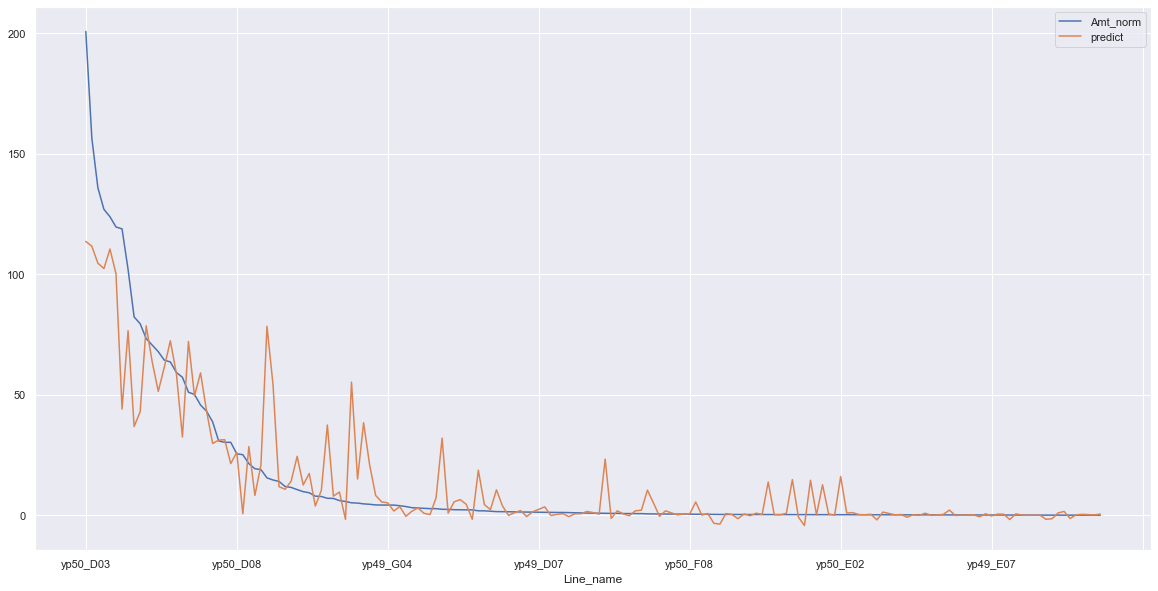

In [36]:
sns.set_context("paper", rc={"font.size":55,"axes.titlesize":5,"axes.labelsize":5}) 
sns.set(rc = {'figure.figsize':(30,10) })
df3.plot(y = ['Amt_norm','predict'], x =  'Line_name', figsize = (20,10))

name = 'Prediction of the sampled library lineplot_ranked'
plt.savefig('ConStrain_on_google_colab/Data/Plots_for_publication/ML_DBTL1/'+name+'.svg',format = 'SVG',  dpi = 120)




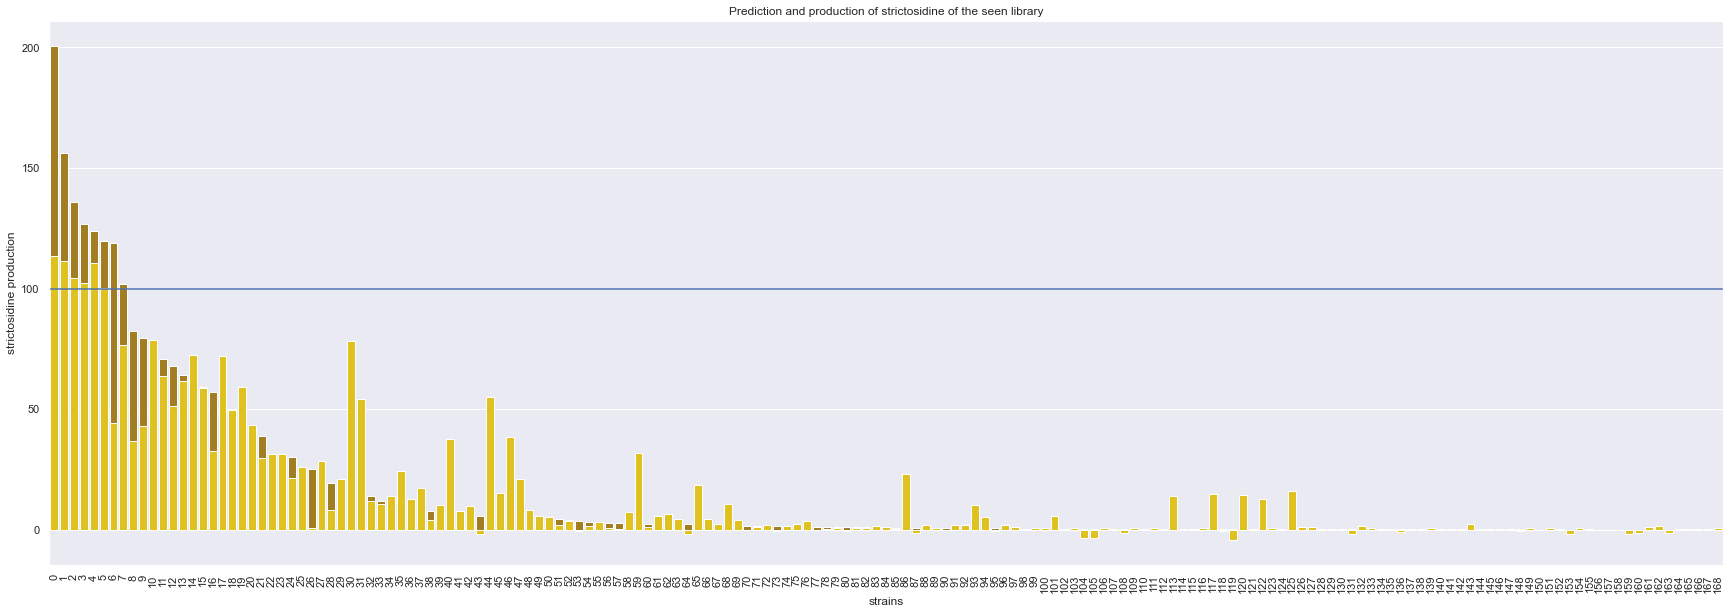

In [37]:
import matplotlib.pyplot as plt
sns.set_context("paper", rc={"font.size":55,"axes.titlesize":5,"axes.labelsize":5}) 
sns.set(rc = {'figure.figsize':(30,10) })


#creating subplots
ax=plt.subplots()
 
#plotting columns
ax=sns.barplot(x=df3.index,y=df3["Amt_norm"],color = 'darkgoldenrod')
ax=sns.barplot(x=df3.index,y=df3["predict"],color = 'gold')

 
#renaming the axes
ax.set(xlabel="strains", ylabel="strictosidine production")
plt.xticks(rotation=90)

ax = plt.gca()
ax.set_title("Prediction and production of strictosidine of the seen library")
ax.axhline(100)


name = 'Prediction of the sampled library_stacked_bar_ranked'
plt.savefig('ConStrain_on_google_colab/Data/Plots_for_publication/ML_DBTL1/'+name+'.svg',format = 'SVG',  dpi = 120)


 
# visualizing illustration
plt.show()

/var/folders/2f/lw3sfzbs7l7f_q1knzbtbwrr0000gp/T/ipykernel_4371/2875567557.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ds2['category'] = 'Predicted'
/var/folders/2f/lw3sfzbs7l7f_q1knzbtbwrr0000gp/T/ipykernel_4371/2875567557.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ds1['category'] = 'Strictosidine'


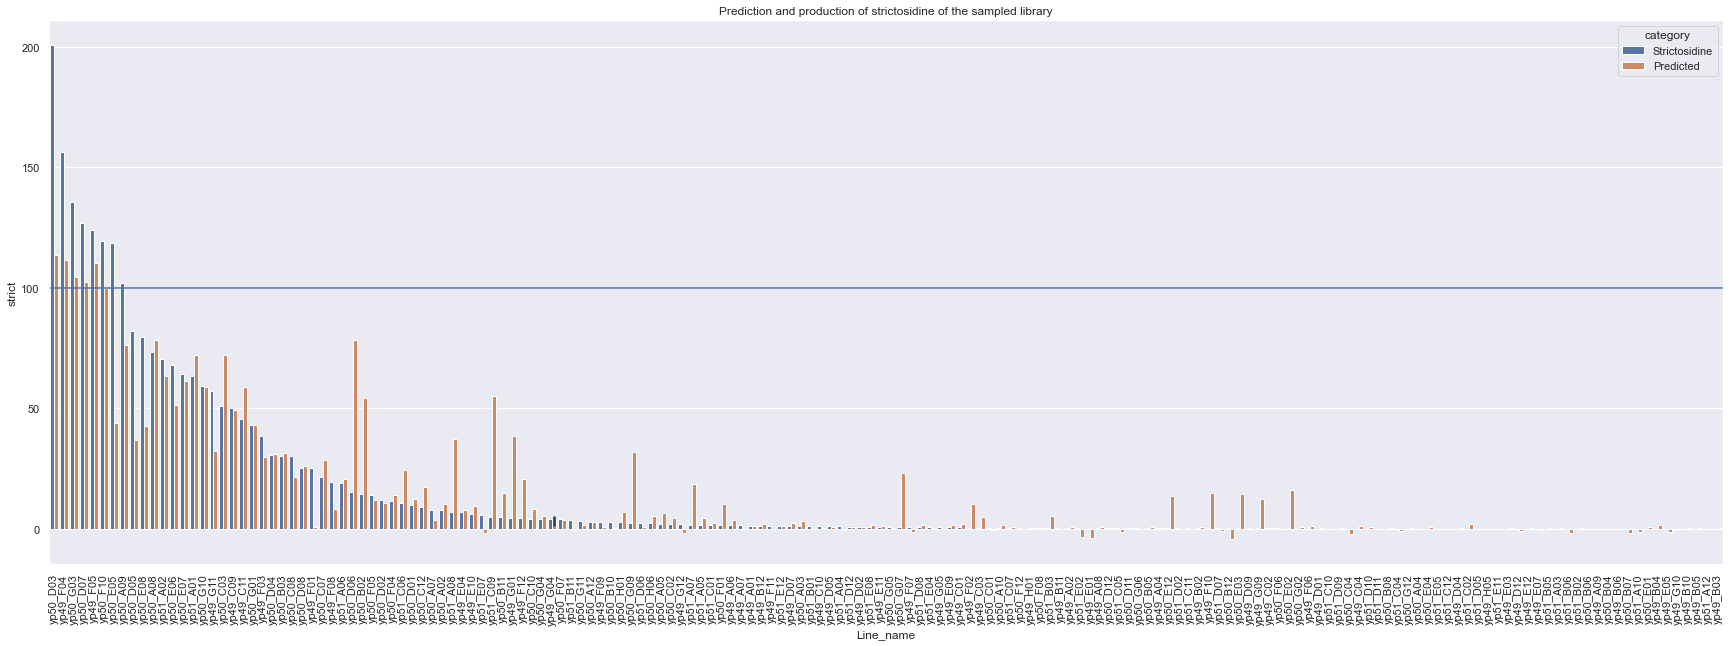

In [38]:
sns.set(rc = {'figure.figsize':(30,10) })


ds1 = df3[['Line_name', 'Amt_norm']]
ds1.columns = ['Line_name', 'strict']

ds2 = df3[['Line_name', 'predict']]
ds2.columns = ['Line_name', 'strict']


ds2['category'] = 'Predicted'
ds1['category'] = 'Strictosidine'
dss = pd.concat([ds1, ds2])

ax = sns.barplot(x='Line_name', y='strict', hue='category', data=dss)

ax = plt.gca()
ax.set_title("Prediction and production of strictosidine of the sampled library")
plt.xticks(rotation=90)
ax.axhline(100)
#ax.add_line
name = 'Prediction of the sampled library_ranked'
plt.savefig('ConStrain_on_google_colab/Data/Plots_for_publication/ML_DBTL1/'+name+'.svg',format = 'SVG',  dpi = 120)




None


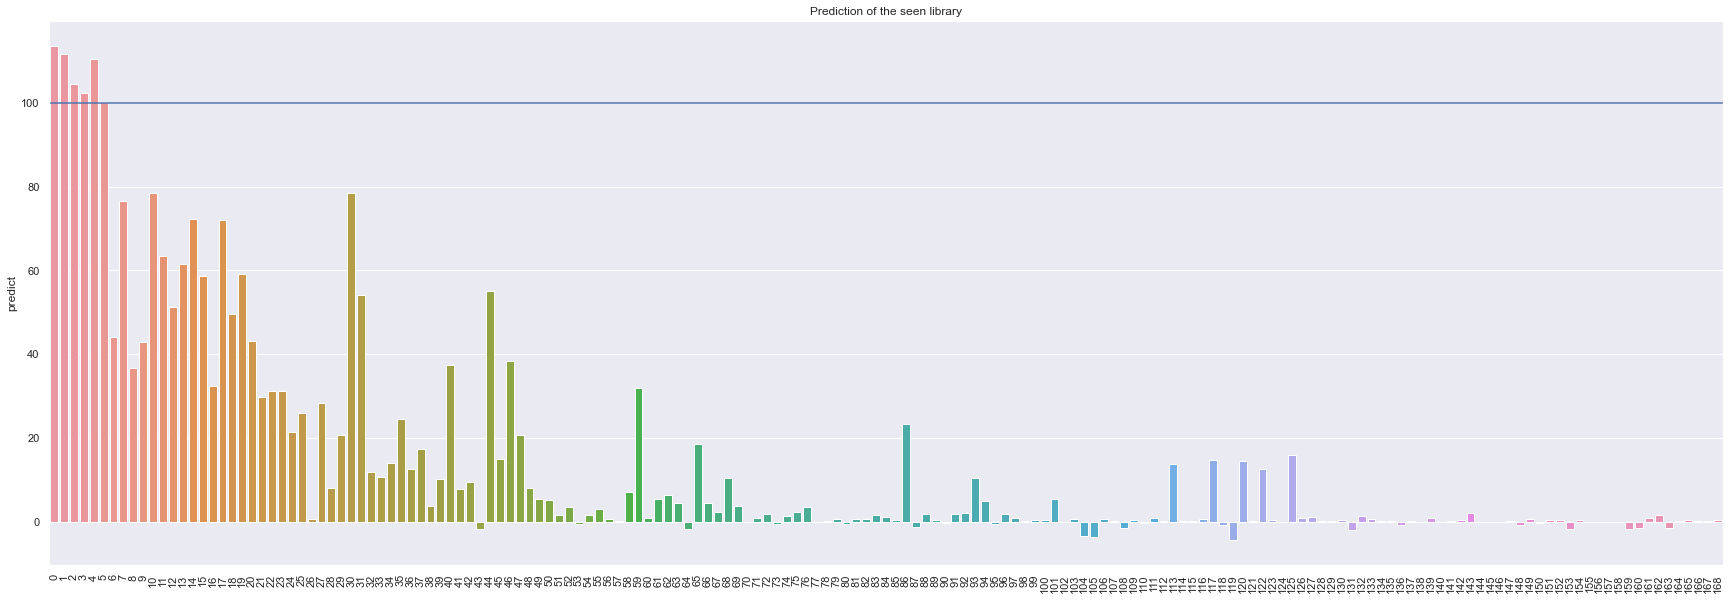

In [39]:
sns.set(rc = {'figure.figsize':(30,10) })

histogram = sns.barplot(data=df3, x=df3.index, y='predict')
histogram.axhline(100)
ax = plt.gca()
ax.set_title("Prediction of the seen library")

#plt.xticks(rotation=90)
histogram.set_xticklabels(histogram.get_xticklabels(), rotation=90)


name = 'Prediction of the sampled library_ranked'
plt.savefig('ConStrain_on_google_colab/Data/Plots_for_publication/ML_DBTL1/'+name+'.svg',format = 'SVG',  dpi = 120)


# this makes sure the labels are not shown
None

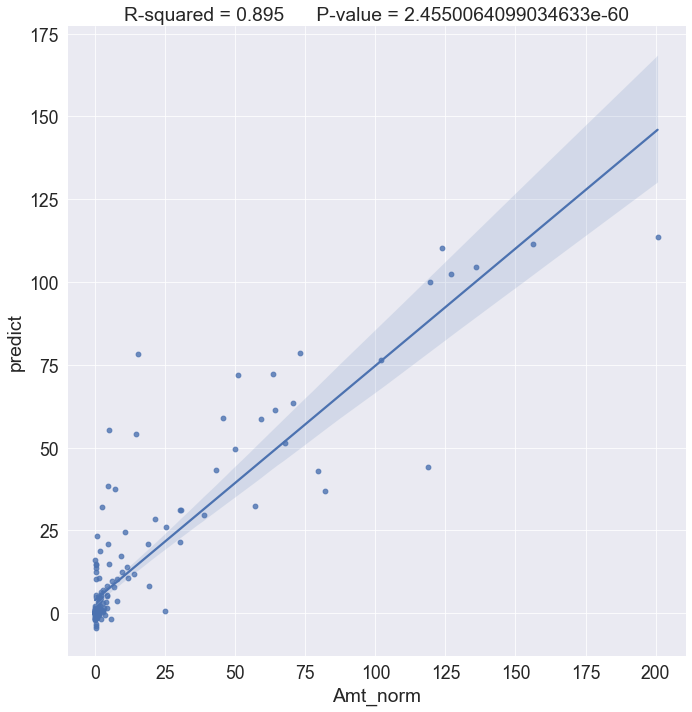

In [40]:
import seaborn as sns
from scipy.stats import pearsonr
import scipy as sp
from scipy import stats

#set seaborn plotting aesthetics as default
sns.set_context("paper", font_scale=2.0, rc={"lines.linewidth": 1.5})

g = sns.lmplot(data=df3, x="Amt_norm", y="predict",  palette="viridis", fit_reg = True, height=10)
r, p = stats.pearsonr(df3['Amt_norm'], df3['predict'])


ax = plt.gca()
ax.set_title(f"R-squared = {r:.3f}      P-value = {p}")

name = 'predicted_vs_amtnorm_corr_ranked'
plt.savefig('ConStrain_on_google_colab/Data/Plots_for_publication/ML_DBTL1/'+name+'.svg',format = 'SVG',  dpi = 120)


None

### 4.2 Learning curve

In [41]:
uploaded_model.model_performance()


ModelMetricsRegression: xgboost
** Reported on train data. **

MSE: 69.32977548225522
RMSE: 8.326450353076947
MAE: 2.5234745858821293
RMSLE: NaN
Mean Residual Deviance: 69.32977548225522


In [42]:
#uploaded_model.learning_curve_plot().


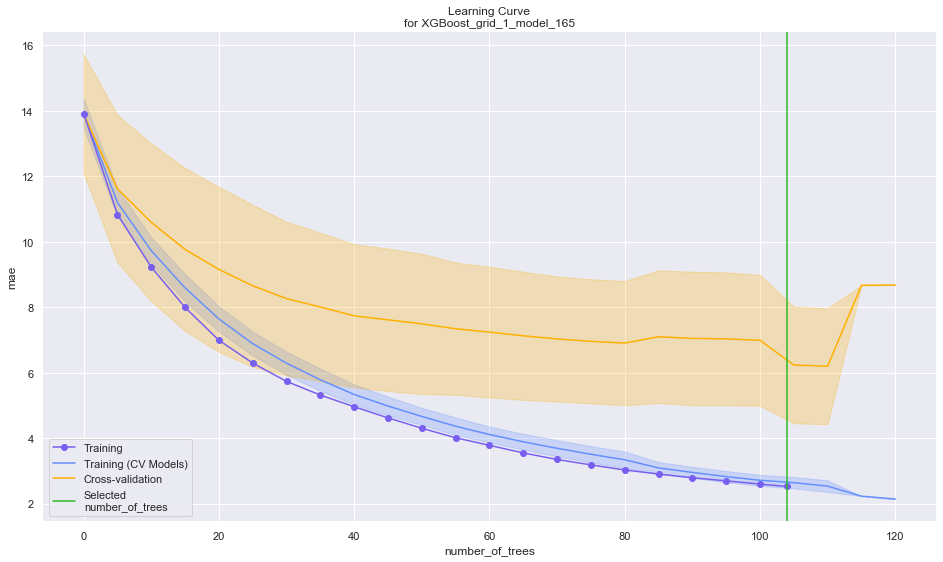

In [59]:

learning_curve = uploaded_model.learning_curve_plot(metric = 'mae')


sns.set()
sns.despine(bottom = True, left = True)
sns.set_style("whitegrid", {'axes.grid' : False})



# removes the borders around the plot
sns.despine(bottom = True, left = True)
sns.set_context("paper", font_scale=1.0, rc={"lines.linewidth": 1})



name = 'learning_curve_merged_data'
plt.savefig('ConStrain_on_google_colab/Data/Plots_for_publication/ML_DBTL1/'+name+'.svg',format = 'SVG',  dpi = 120)

None

## 5. Find predicted genotypes

In [60]:
import numpy as np

In [61]:
all_genotypes = pd.read_csv('ConStrain_on_google_colab/Data/AutoML/systematic_names_on_all_combinations.csv')
all_genotypes_df = h2o.H2OFrame(pd.concat([all_genotypes], axis='columns'))
all_genotypes_df

Parse progress: |████████████████████████████████████████████████████████████████| (done) 100%


0,1,2,3
1,1,5,1
1,1,5,2
1,1,5,3
1,1,5,4
1,1,5,5
1,1,5,6
1,1,5,7
1,1,5,8
1,1,5,9
1,1,5,10


In [62]:
input_fixed = new_input_for_ml[['0','1','2','3']]
input_fixed

,0,1,2,3
75,5,2,6,3
21,3,2,6,2
77,6,2,6,5
99,5,2,5,5
27,3,2,6,2
...,...,...,...,...
129,7,3,7,5
144,7,1,8,6
133,7,4,7,1
139,7,1,7,6


### 5.1 Getting rid of the genotypes we have already tested:

In [63]:
df_diff = all_genotypes[~all_genotypes.apply(tuple,1).isin(input_fixed.apply(tuple,1))]
df_diff

,0,1,2,3
0,1,1,5,1
1,1,1,5,2
3,1,1,5,4
4,1,1,5,5
6,1,1,5,7
...,...,...,...,...
1275,8,4,8,6
1276,8,4,8,7
1277,8,4,8,8
1278,8,4,8,9


In [64]:
# make the diff into a df 
all_genotypes_df = h2o.H2OFrame(pd.concat([df_diff], axis='columns'))
all_genotypes_df['0']= all_genotypes_df['0'].asfactor()
all_genotypes_df['1']= all_genotypes_df['1'].asfactor()
all_genotypes_df['2'] = all_genotypes_df['2'].asfactor()
all_genotypes_df['3'] = all_genotypes_df['3'].asfactor()

Parse progress: |████████████████████████████████████████████████████████████████| (done) 100%


In [65]:
predicted = best_model.predict(all_genotypes_df)

xgboost prediction progress: |███████████████████████████████████████████████████| (done) 100%


In [66]:
len(predicted)

1119

In [67]:
predicted_norm = predicted.as_data_frame()
predicted_norm.head()

,predict
0,0.581198
1,0.109430
2,0.403479
3,1.034518
4,0.149953


## 6. Predict the  phenotypes from the whole library

In [68]:
# making predictions into a list
predicted_list = predicted_norm['predict'].values.tolist()

# Adding predictions to our dataframe
df_diff['predicted_norm_strict'] = predicted_list

# Sorting the dataframe
predicted_merged_sorted = df_diff.sort_values('predicted_norm_strict', ascending=False)
predicted_merged_sorted

/var/folders/2f/lw3sfzbs7l7f_q1knzbtbwrr0000gp/T/ipykernel_4371/105107836.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_diff['predicted_norm_strict'] = predicted_list


,0,1,2,3,predicted_norm_strict
697,5,2,6,8,126.278099
691,5,2,6,2,126.278099
694,5,2,6,5,126.278099
852,6,2,6,3,121.909821
851,6,2,6,2,121.733055
...,...,...,...,...,...
196,2,1,8,7,-2.907077
966,7,1,5,7,-2.923713
836,6,1,8,7,-2.937418
996,7,1,8,7,-3.415720


If we want the names on the genotypes we can do the following: 

In [69]:
g8h_list_of_index = ["Cacu", "Opum","Cro","Vmin","Smus","Rsep","Oeu","Ccal"]
cpr_list_of_index = ["Cro", "Aan","Ara","Clo","Rse","Ahu","Ani","Cac","Oeu","Cpo"]
promoters = ["CYC1", "ENO2","PCK1","RPL15B", "CCW12", "TPI1","MLS1","URE2"]

g8h_genotype = []
cpr_genotype = []

pg8h_genotype = []
pcpr_genotype = []

predicted_list = []
# adding index of genotypes to individual rows 
for index, row in predicted_merged_sorted.iterrows():
    g8h_genotype.append(g8h_list_of_index[int(row['0'])-1])
    cpr_genotype.append(cpr_list_of_index[int(row['3'])-1])
    pg8h_genotype.append(promoters[int(row['1'])-1])
    pcpr_genotype.append(promoters[int(row['2'])-1])
    predicted_list.append(row['predicted_norm_strict'])
    
    
list_of_lists = [g8h_genotype,pg8h_genotype,pcpr_genotype, cpr_genotype, predicted_list  ]

## 7. Top 20 predicted producers

In [70]:
df_with_genotypes = pd.DataFrame(list_of_lists )
df_with_genotypes = df_with_genotypes.T
df_with_genotypes.columns = ['G8H', 'pG8H', 'pCPR', 'CPR', 'Predicted_strict_production']
df_with_genotypes.head(50)


,G8H,pG8H,pCPR,CPR,Predicted_strict_production
0,Smus,ENO2,TPI1,Cac,126.278099
1,Smus,ENO2,TPI1,Aan,126.278099
2,Smus,ENO2,TPI1,Rse,126.278099
3,Rsep,ENO2,TPI1,Ara,121.909821
4,Rsep,ENO2,TPI1,Aan,121.733055
5,Rsep,ENO2,TPI1,Cac,121.603302
6,Cro,ENO2,TPI1,Ara,121.428566
7,Cro,ENO2,TPI1,Rse,121.428566
8,Cro,ENO2,TPI1,Cac,121.209053
9,Rsep,ENO2,TPI1,Clo,116.605431


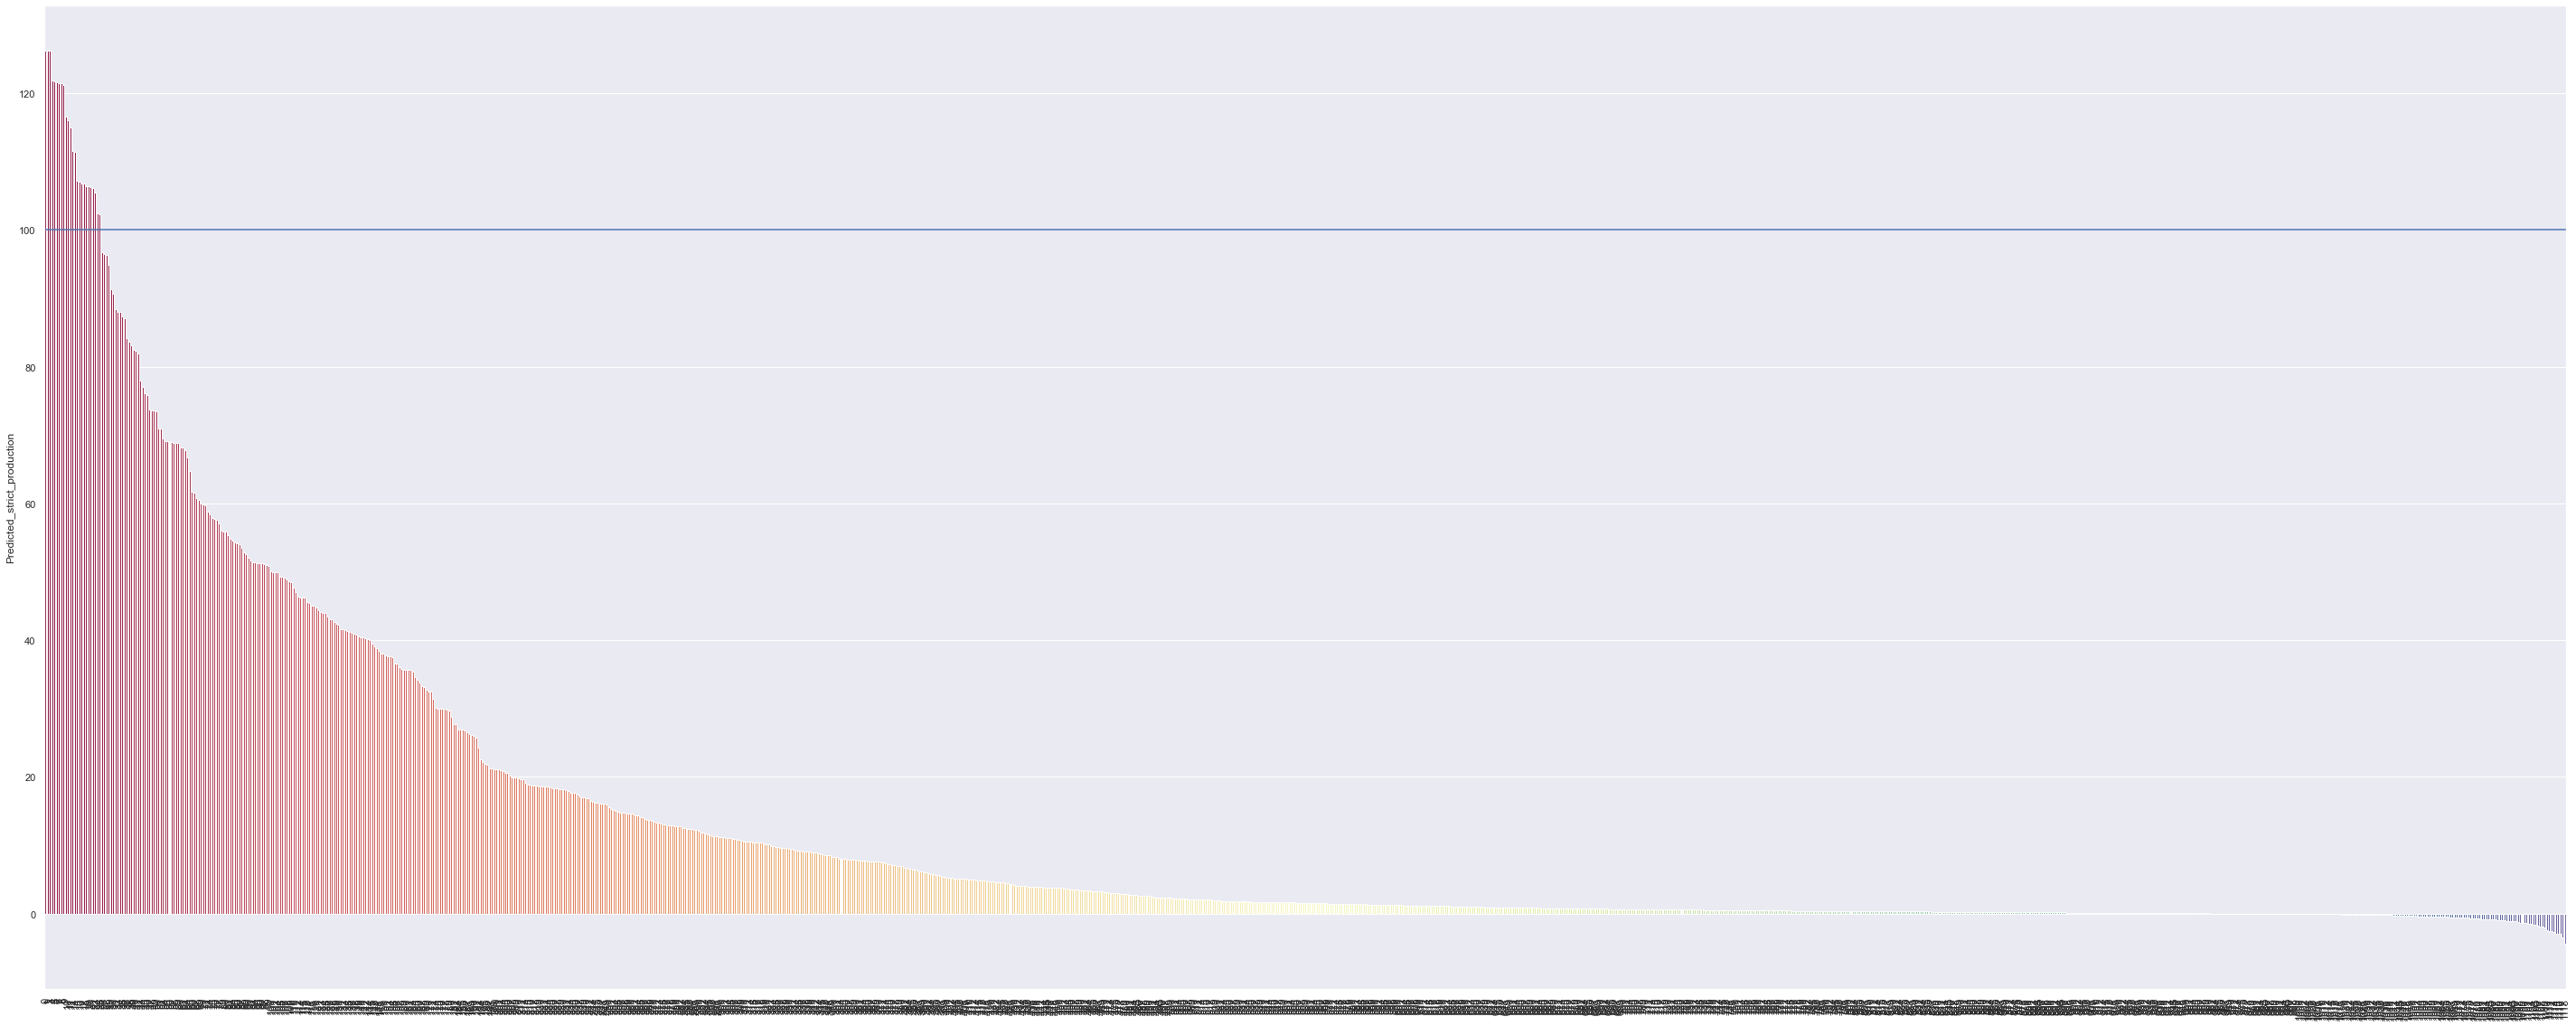

In [71]:
sns.set(rc = {'figure.figsize':(50,20) })

histogram = sns.barplot(data=df_with_genotypes, x=df_with_genotypes.index, y='Predicted_strict_production', palette= "Spectral")

histogram.axhline(100)

histogram.set_xticklabels(histogram.get_xticklabels(), rotation=90)

name = 'Predicted strict production of all unseen genotype_merged'
plt.savefig('ConStrain_on_google_colab/Data/Plots_for_publication/ML_DBTL1/'+name+'.svg',format = 'SVG',  dpi = 120)


# this makes sure the labels are not shown
None

In [72]:
#df_with_genotypes.to_csv('ConStrain_on_google_colab/Data/processed/ML_predicted/2022_2807_categorical_DeepLearning_grid_2_AutoML_1_20220919_101302_model_8')

In [73]:
df_with_genotypes.to_csv('ConStrain_on_google_colab/Data/AutoML/top20_ML_predicted_after_first_DBTL_merged_analytics.csv', index=False)

In [74]:
df_with_genotypes.to_csv('ConStrain_on_google_colab/Data/Plots_for_publication/ML_DBTL1/predicted_unseen_comb_ML1_trained_on_merged_data_ranked.csv')


In [75]:
h2o.cluster.shutdown()

AttributeError: 'function' object has no attribute 'shutdown'